In [2]:
from matplotlib import pyplot as plt
import circle_fit as cf
import numpy as np
import time
import math
import random
import cv2
import os
%run functions.ipynb

## Contrast Enhancement

In [8]:
def swift_algo(gray, Lambda=3, Gamma=2):
    ## Step 1: Image normalization
    norm = gray/255
    
    ## Step 2: Comupte u series from normalized image
    u = np.log(1+norm)
    u_avg = np.mean(u)
    u_std = np.std(u)
    
    ## Step 3: Compute ...
    v = np.power(u, Lambda)/Lambda
    f = np.power( np.exp( (np.tan(u)-u_std) / (np.exp(u)-v)), Gamma)
    
    ## Step 4: Redefine distrubution
    t = (f-np.min(f)) / (np.max(f)-np.min(f))
    final = (t*255).astype('uint8')
    
    return final

In [6]:
a = np.asarray([[1,2],[3,4]]) / np.asarray([[1,3],[2,4]])

a

array([[1.        , 0.66666667],
       [1.5       , 1.        ]])

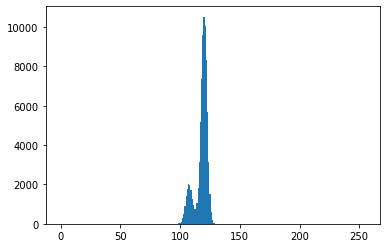

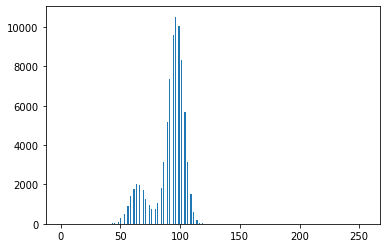

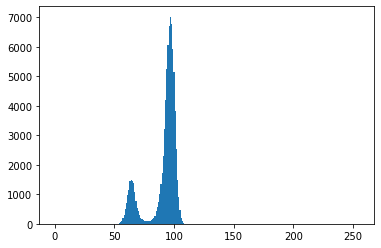

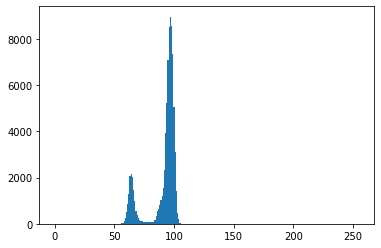

In [29]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_1/Cut")
## Read image
img, gray = read_img("10_mean_58.bmp")
plt.hist(gray.ravel(), bins=256, range=[0, 255])
plt.show()

cEn = swift_algo(gray, Lambda=3, Gamma=2)
plt.hist(cEn.ravel(), bins=256, range=[0, 255])
plt.show()

blur = cv2.GaussianBlur(cEn,(5,5),0)
plt.hist(blur.ravel(), bins=256, range=[0, 255])
plt.show()


dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
plt.hist(dst.ravel(), bins=256, range=[0, 255])
plt.show()

_, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
median = median_filter(threshed, 25)

cv2.imshow("Gray", gray)
cv2.imshow("Contrast Enhancement", cEn)
cv2.imshow("Blur", blur)
cv2.imshow("Non Local Means", dst)
cv2.imshow("Thresh", threshed)
cv2.imshow("Median", median)
cv2.waitKey(0)
cv2.destroyAllWindows()

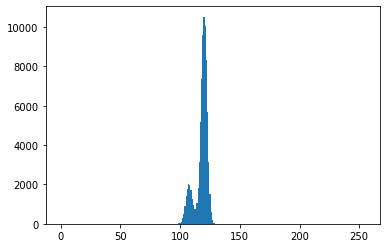

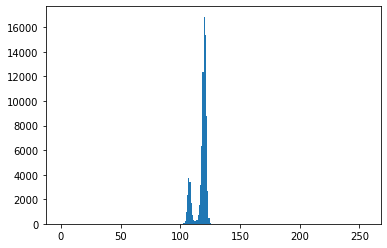

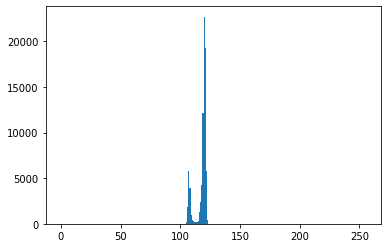

In [27]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_1/Cut")
## Read image
img, gray = read_img("10_mean_58.bmp")
height, width = get_imgInfo(img)
plt.hist(gray.ravel(), bins=256, range=[0, 255])
plt.show()

## Image processing
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.hist(blur.ravel(), bins=256, range=[0, 255])
plt.show()

dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
plt.hist(dst.ravel(), bins=256, range=[0, 255])
plt.show()

_, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# threshed = threshold_moment_preserving(img, gray)
# threshed = removeBorder(gray2, height, width)



## Options
# opened = opening(threshed, 5)
median = median_filter(threshed, 25)
# closed = closing(median, 3)
# opened = opening(closed, 3)
# edge = edge_detect(median, 0, 20)
            

## Show processed images    
# cv2.imshow("Original", img)
cv2.imshow("Gray", gray)
cv2.imshow("Blur", blur)
# cv2.imshow("Non Local Means", dst)
cv2.imshow("Thresh", threshed)
cv2.imshow("Median", median)
# cv2.imshow("Opening", opened)
# cv2.imshow("Closing", closed)
# cv2.imshow("Edge", edge)
cv2.waitKey(0)
cv2.destroyAllWindows()